In [3]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn 

In [33]:
np.random.choice(list_of_test_image_urls)

'/home/ubuntu/Distracted_Data/imgs/test/img_80595.jpg'

In [4]:
# function to get the list of paths in a directory
def get_paths(root):
    paths = []
    for path, subdirs, files in os.walk(root):
        for name in files:
            paths.append(os.path.join(path, name))
    return paths

In [5]:
train_paths = get_paths(os.getcwd() + '/Distracted_Data/imgs/train')
print('There are {} images in the train set.'.format(len(train_paths)))

There are 22424 images in the train set.


In [11]:
test_paths = get_paths(os.getcwd() + '/Distracted_Data/imgs/test')
print('There are {} images in the test set.'.format(len(test_paths)))

There are 79726 images in the test set.


#### Class Definitions

### Class Definitions

The 10 classes to predict are:  

c0: safe driving  
c1: texting - right  
c2: talking on the phone - right  
c3: texting - left  
c4: talking on the phone - left  
c5: operating the radio  
c6: drinking  
c7: reaching behind  
c8: hair and makeup  
c9: talking to passenger 

In [45]:
class_names_dict = {
    'c0': "safe driving",
    'c1': "texting - right",
    'c2': "talking on the phone - right",
    'c3': "texting - left",
    'c4': "talking on the phone - left ",
    'c5': "operating the radio ",
    'c6': "drinking",
    'c7': "reaching behind",
    'c8': "hair and makeup ",
    'c9': "talking to passenger ",
} 

(480, 640, 3)


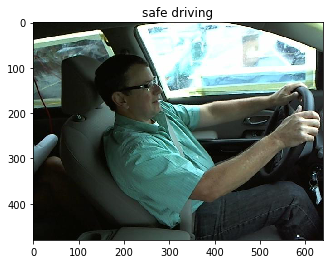

(480, 640, 3)


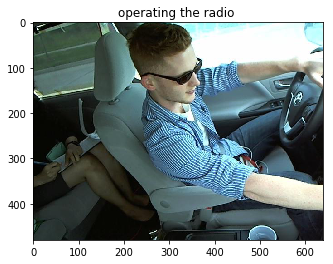

(480, 640, 3)


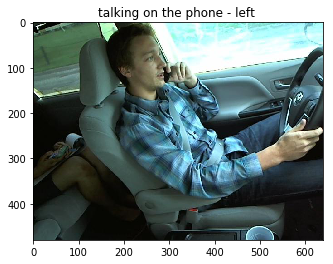

(480, 640, 3)


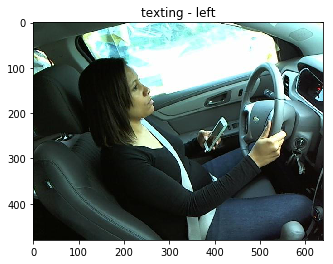

(480, 640, 3)


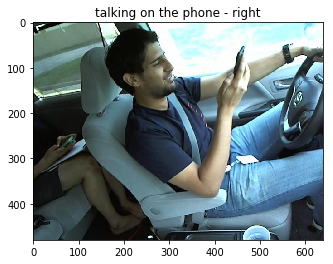

(480, 640, 3)


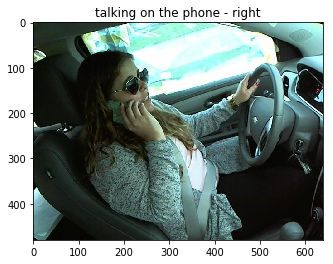

(480, 640, 3)


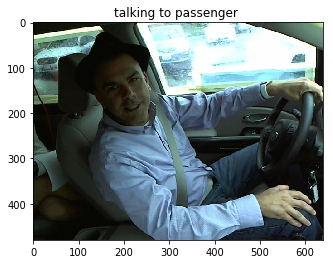

(480, 640, 3)


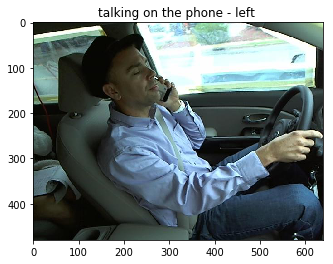

(480, 640, 3)


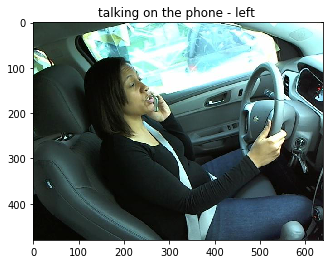

(480, 640, 3)


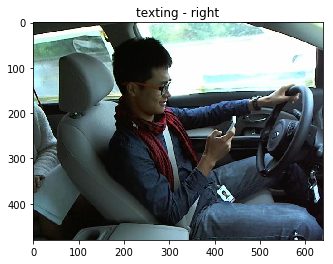

In [86]:
#Plot few images from the dataset
list_of_train_image_urls = get_paths(os.getcwd() + '/Distracted_Data/imgs/train')
for i in range(10):
    url = np.random.choice(list_of_test_image_urls)
    sample_image = plt.imread(url)
    print(sample_image.shape)
    #list_of_test_image_urls[0]
    plt.imshow(sample_image)
    class_name=url.split('/')[-2]
    plt.title(class_names_dict.get(class_name))
    plt.show()


In [50]:
imgs_list = pd.read_csv(os.getcwd() + '/Distracted_Data/driver_imgs_list.csv')
subj = np.unique(imgs_list['subject'])
print('There are {} drivers.'.format(len(subj)))
print(subj)

There are 26 drivers.
['p002' 'p012' 'p014' 'p015' 'p016' 'p021' 'p022' 'p024' 'p026' 'p035'
 'p039' 'p041' 'p042' 'p045' 'p047' 'p049' 'p050' 'p051' 'p052' 'p056'
 'p061' 'p064' 'p066' 'p072' 'p075' 'p081']


In [62]:
subj_count = {}
for sub in subj:
    subj_count[sub] = len(imgs_list[imgs_list['subject']==sub])

print("Number of Images per driver in train set {} ".format(subj_count))

Number of Images per driver in train set {'p022': 1233, 'p049': 1011, 'p021': 1237, 'p026': 1196, 'p002': 725, 'p041': 605, 'p042': 591, 'p045': 724, 'p047': 835, 'p024': 1226, 'p072': 346, 'p075': 814, 'p016': 1078, 'p015': 875, 'p014': 876, 'p039': 651, 'p012': 823, 'p035': 848, 'p052': 740, 'p051': 920, 'p050': 790, 'p056': 794, 'p066': 1034, 'p064': 820, 'p061': 809, 'p081': 823} /n


#### Number of images per class

In [63]:
cls_name = np.unique(imgs_list['classname'])
print('There are {} classes.'.format(len(cls_name)))
cls_count = {}
for cls in cls_name:
    cls_count[cls] = len(imgs_list[imgs_list['classname']==cls])
print("Number of classes per image {}".format(cls_count))

There are 10 classes.
Number of classes per image {'c9': 2129, 'c8': 1911, 'c3': 2346, 'c2': 2317, 'c1': 2267, 'c0': 2489, 'c7': 2002, 'c6': 2325, 'c5': 2312, 'c4': 2326}


#### Visualize Class distribution 

In [1]:
columns = ['class_names'] + ['total']

df = []
for cls in list(cls_name):
    row = [cls]
    num = len(imgs_list[(imgs_list['classname']==cls)])
    row.append(num)
    df.append(row)
df = pd.DataFrame(df, columns=columns)

NameError: name 'cls_name' is not defined

In [88]:
df

,class_names,total
0,c0,2489
1,c1,2267
2,c2,2317
3,c3,2346
4,c4,2326
5,c5,2312
6,c6,2325
7,c7,2002
8,c8,1911
9,c9,2129


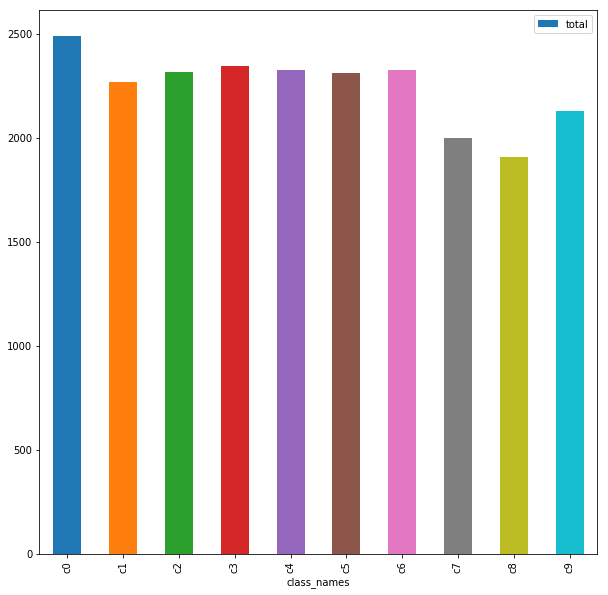

In [85]:
 df.plot.bar(x='class_names', y='total', figsize=(10, 10))

In [89]:

from skimage.io import imread, imshow, imsave
from matplotlib.pyplot import figure, axis

/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotli

/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotli

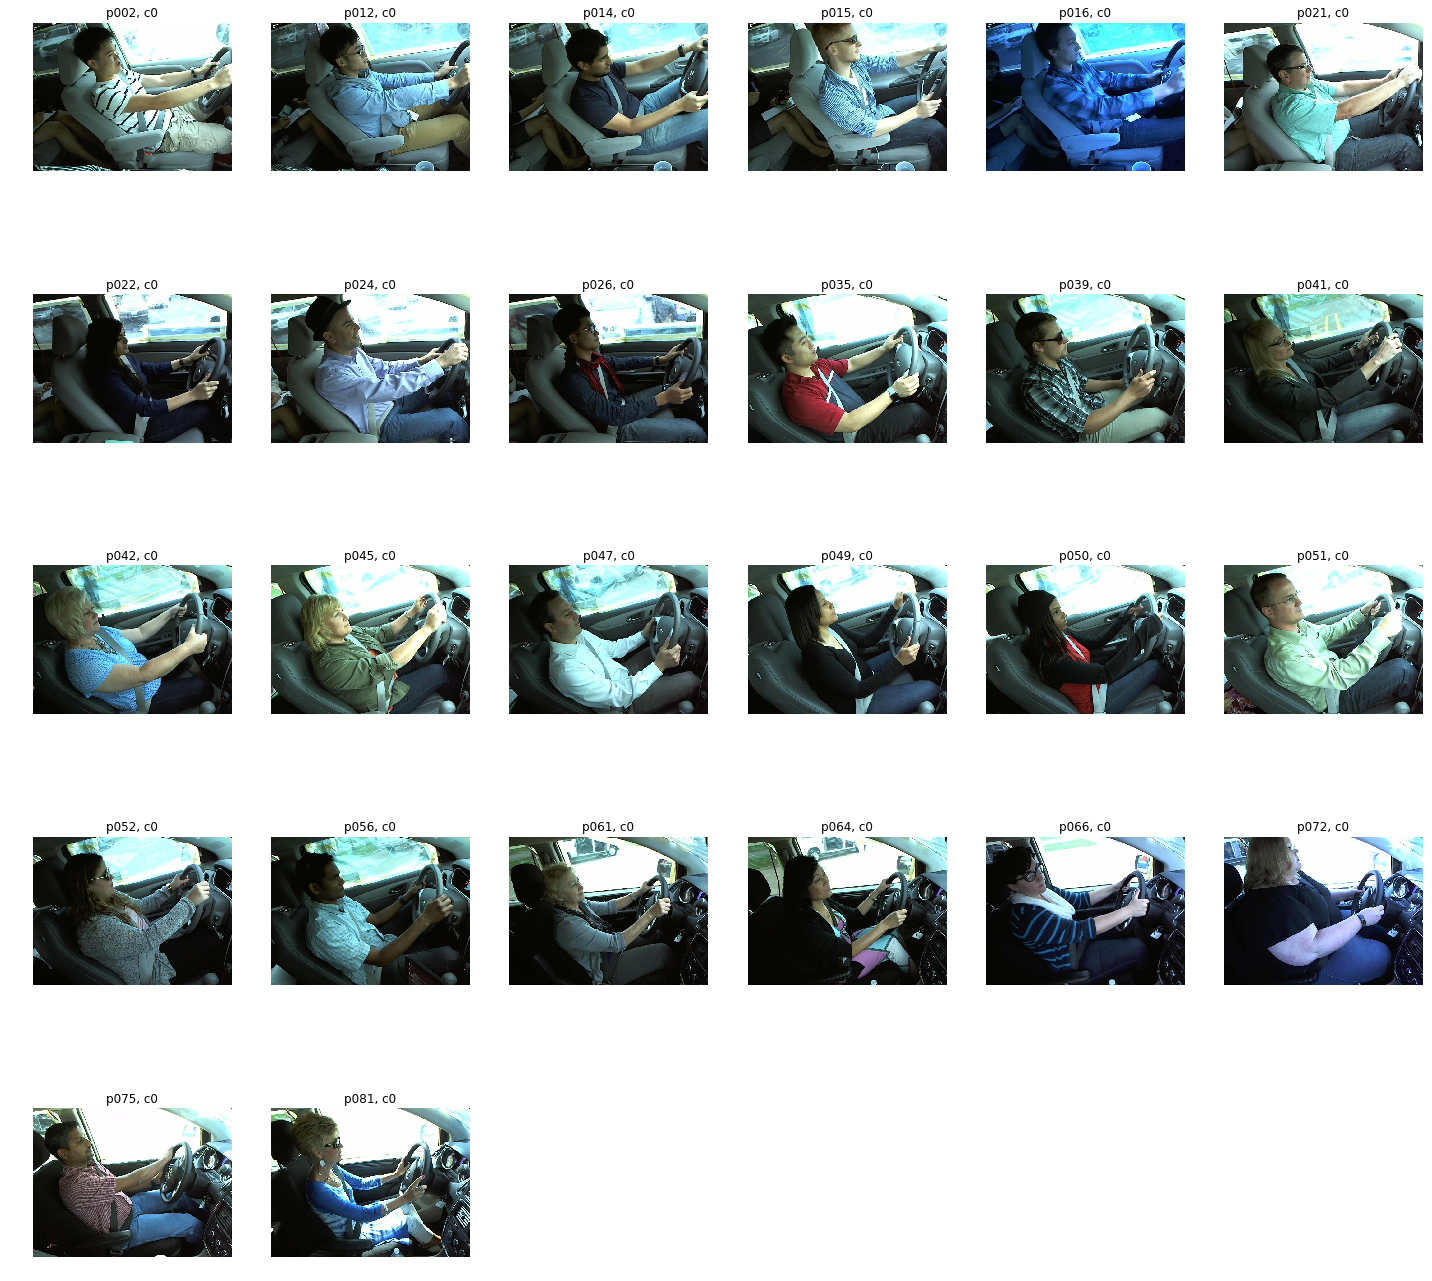

In [95]:

fig = figure(figsize=(20, 20))
for i in range(len(subj)):
    sub = subj[i]
    img_sample = imgs_list[imgs_list['subject']==sub].iloc[0]
    classname = img_sample['classname']
    name = img_sample['img']
    path = os.getcwd() + '/Distracted_Data/imgs/train/'+classname+'/'+name
    a = fig.add_subplot(5, 6, i+1)
    a.title.set_text(sub+', '+classname)
    image = imread(path)
    imshow(image)
    axis('off')
    

In [2]:
# Check if driver distribution across classes to make sure that driver features do not affect classification
columns = ['drivers'] + list(cls_name) + ['total']

df = []
for sub in subj:
    row = [sub]
    for cls in cls_name:
        num = len(imgs_list[(imgs_list['subject']==sub) & (imgs_list['classname']==cls)])
        row.append(num)
    row.append(subj_count[sub])
    df.append(row)
df = pd.DataFrame(df, columns=columns)

NameError: name 'cls_name' is not defined

In [20]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
cv.resize(plt.imread(os.getcwd() + '/profile.jpg')/255.0, (100, 100))
img2 = cv.resize(img/255.0, (100, 100))
img3=cv.resize(img,(100,100))
img3=img3/255.0
print(img2)

[[[0.18039216 0.19607843 0.17254902]
  [0.15870588 0.17439216 0.15086275]
  [0.13196078 0.14372549 0.12019608]
  ...
  [0.97686275 0.9927451  0.98392157]
  [0.99458824 0.99611765 0.97247059]
  [0.99698039 0.99905882 0.96231373]]

 [[0.17372549 0.19333333 0.15803922]
  [0.1827451  0.20235294 0.16705882]
  [0.19254902 0.20823529 0.17294118]
  ...
  [1.         0.99490196 0.95803922]
  [0.99647059 0.98992157 0.95658824]
  [0.99807843 0.99643137 0.97690196]]

 [[0.17254902 0.19803922 0.15098039]
  [0.17647059 0.20196078 0.15490196]
  [0.18431373 0.20490196 0.15882353]
  ...
  [0.99019608 0.99901961 0.75784314]
  [0.97686275 1.         0.79588235]
  [0.98137255 0.99862745 0.91980392]]

 ...

 [[0.61333333 0.69431373 0.70431373]
  [0.64843137 0.7427451  0.76666667]
  [0.49509804 0.60196078 0.6127451 ]
  ...
  [0.32156863 0.3372549  0.33137255]
  [0.30843137 0.32019608 0.31235294]
  [0.33470588 0.34647059 0.33862745]]

 [[0.54309804 0.62388235 0.66701961]
  [0.50682353 0.58121569 0.62      ]


In [21]:
print(img3)

[[[0.18039216 0.19607843 0.17254902]
  [0.15686275 0.17254902 0.14901961]
  [0.13333333 0.14509804 0.12156863]
  ...
  [0.97647059 0.99215686 0.98431373]
  [0.99215686 0.99607843 0.97254902]
  [0.99607843 1.         0.96078431]]

 [[0.17254902 0.19215686 0.15686275]
  [0.18431373 0.20392157 0.16862745]
  [0.19215686 0.20784314 0.17254902]
  ...
  [1.         0.99607843 0.95686275]
  [0.99607843 0.98823529 0.95686275]
  [0.99607843 0.99607843 0.97647059]]

 [[0.17254902 0.2        0.15294118]
  [0.17647059 0.20392157 0.15686275]
  [0.18431373 0.20392157 0.16078431]
  ...
  [0.99215686 1.         0.75686275]
  [0.97647059 1.         0.79607843]
  [0.98039216 1.         0.91764706]]

 ...

 [[0.61176471 0.69411765 0.70196078]
  [0.64705882 0.74117647 0.76470588]
  [0.49411765 0.60392157 0.61176471]
  ...
  [0.32156863 0.3372549  0.33333333]
  [0.30980392 0.32156863 0.31372549]
  [0.33333333 0.34509804 0.3372549 ]]

 [[0.54117647 0.62352941 0.66666667]
  [0.50588235 0.58039216 0.61960784]
